In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

/home/ecosystem/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
## Get working directory
os.getcwd()

'/home/ecosystem'

In [3]:
os.chdir('/home/ecosystem/DePaul/CSC478/Week2')

In [4]:
vstable = pd.read_csv("Video_Store.csv", index_col=0)

vstable.shape

(40, 6)

In [5]:
vstable.head(10)

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
ID,,,,,,
1,M,45000,25,27,2.5,Action
2,F,54000,33,12,3.4,Drama
3,F,32000,20,42,1.6,Comedy
4,F,59000,70,16,4.2,Drama
5,M,37000,35,25,3.2,Action
6,M,18000,20,33,1.7,Action
7,F,29000,45,19,3.8,Drama
8,M,74000,25,31,2.4,Action
9,M,38000,21,18,2.1,Comedy


In [6]:
vstable.columns

Index([u'Gender', u'Income', u'Age', u'Rentals', u'AvgPerVisit', u'Genre'], dtype='object')

In [7]:
vstable.dtypes

Gender          object
Income           int64
Age              int64
Rentals          int64
AvgPerVisit    float64
Genre           object
dtype: object

In [8]:
vstable["Income"] = vstable["Income"].astype(float)
vstable.dtypes

Gender          object
Income         float64
Age              int64
Rentals          int64
AvgPerVisit    float64
Genre           object
dtype: object

In [9]:
vstable.describe()

,Income,Age,Rentals,AvgPerVisit
count,40.000000,40.000000,40.000000,40.000000
mean,41500.000000,31.500000,26.175000,2.792500
std,22925.744123,12.752074,9.594035,0.833401
min,1000.000000,15.000000,11.000000,1.200000
25%,24750.000000,21.000000,19.000000,2.200000
50%,41000.000000,30.000000,25.000000,2.800000
75%,57500.000000,36.500000,32.250000,3.325000
max,89000.000000,70.000000,48.000000,4.600000


In [10]:
min_sal = vstable["Income"].min()
max_sal = vstable["Income"].max()
print min_sal, max_sal

1000.0 89000.0


In [11]:
vstable.describe(include="all")

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
count,40,40.000000,40.000000,40.000000,40.000000,40
unique,2,NaN,NaN,NaN,NaN,3
top,M,NaN,NaN,NaN,NaN,Action
freq,21,NaN,NaN,NaN,NaN,15
mean,NaN,41500.000000,31.500000,26.175000,2.792500,NaN
std,NaN,22925.744123,12.752074,9.594035,0.833401,NaN
min,NaN,1000.000000,15.000000,11.000000,1.200000,NaN
25%,NaN,24750.000000,21.000000,19.000000,2.200000,NaN
50%,NaN,41000.000000,30.000000,25.000000,2.800000,NaN
75%,NaN,57500.000000,36.500000,32.250000,3.325000,NaN


In [12]:
norm_sal = (vstable["Income"] - min_sal) / (max_sal-min_sal)
print norm_sal.head(10)

ID
1     0.500000
2     0.602273
3     0.352273
4     0.659091
5     0.409091
6     0.193182
7     0.318182
8     0.829545
9     0.420455
10    0.727273
Name: Income, dtype: float64


In [13]:
age_z = (vstable["Age"] - vstable["Age"].mean()) / vstable["Age"].std()
age_z.head(5)

ID
1   -0.509721
2    0.117628
3   -0.901814
4    3.019117
5    0.274465
Name: Age, dtype: float64

In [14]:
inc_bins = pd.qcut(vstable.Income, 3)
inc_bins.head(10)

ID
1     (29000, 49000]
2     (49000, 89000]
3     (29000, 49000]
4     (49000, 89000]
5     (29000, 49000]
6      [1000, 29000]
7      [1000, 29000]
8     (49000, 89000]
9     (29000, 49000]
10    (49000, 89000]
Name: Income, dtype: category
Categories (3, object): [[1000, 29000] < (29000, 49000] < (49000, 89000]]

In [15]:
inc_bins = pd.qcut(vstable.Income, [0, .33, .66, 1], labels=["low", "mid", "high"], retbins=True)
inc_bins

(ID
 1      mid
 2     high
 3      mid
 4     high
 5      mid
 6      low
 7      low
 8     high
 9      mid
 10    high
 11     mid
 12     low
 13    high
 14     mid
 15    high
 16     low
 17     mid
 18     low
 19     low
 20     low
 21     mid
 22     low
 23     low
 24    high
 25     low
 26    high
 27    high
 28    high
 29     low
 30     mid
 31    high
 32     mid
 33     low
 34     low
 35    high
 36     low
 37    high
 38     mid
 39    high
 40     low
 Name: Income, dtype: category
 Categories (3, object): [low < mid < high],
 array([  1000.,  29000.,  48480.,  89000.]))

In [16]:
vs_numeric = vstable[["Age","Income","Rentals","AvgPerVisit"]]
vs_num_std = (vs_numeric - vs_numeric.mean()) / vs_numeric.std()
vs_num_std.head(10)

,Age,Income,Rentals,AvgPerVisit
ID,,,,
1,-0.509721,0.152667,0.085991,-0.350971
2,0.117628,0.545239,-1.477480,0.728941
3,-0.901814,-0.414381,1.649462,-1.430883
4,3.019117,0.763334,-1.060555,1.688862
5,0.274465,-0.196286,-0.122472,0.488960
6,-0.901814,-1.025049,0.711379,-1.310893
7,1.058651,-0.545239,-0.747860,1.208901
8,-0.509721,1.417620,0.502917,-0.470962
9,-0.823395,-0.152667,-0.852092,-0.830932


In [17]:
zscore = lambda x: (x - x.mean()) / x.std()
vs_num_std = vs_numeric.apply(zscore)
vs_num_std.head()

,Age,Income,Rentals,AvgPerVisit
ID,,,,
1,-0.509721,0.152667,0.085991,-0.350971
2,0.117628,0.545239,-1.477480,0.728941
3,-0.901814,-0.414381,1.649462,-1.430883
4,3.019117,0.763334,-1.060555,1.688862
5,0.274465,-0.196286,-0.122472,0.488960


In [18]:
zscore = lambda x: ((x - x.mean()) / x.std()) if (x.dtypes==np.float64 or x.dtypes==np.int64) else x
vs_std = vstable.copy()
vs_std.apply(zscore).head()

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
ID,,,,,,
1,M,0.152667,-0.509721,0.085991,-0.350971,Action
2,F,0.545239,0.117628,-1.477480,0.728941,Drama
3,F,-0.414381,-0.901814,1.649462,-1.430883,Comedy
4,F,0.763334,3.019117,-1.060555,1.688862,Drama
5,M,-0.196286,0.274465,-0.122472,0.488960,Action


In [19]:
vstable.groupby("Gender").mean()

,Income,Age,Rentals,AvgPerVisit
Gender,,,,
F,40631.578947,33.631579,27.684211,2.968421
M,42285.714286,29.571429,24.809524,2.633333


In [20]:
vstable.groupby("Genre").mean()

,Income,Age,Rentals,AvgPerVisit
Genre,,,,
Action,32666.666667,24.066667,29.933333,2.466667
Comedy,45000.000000,31.916667,25.666667,2.641667
Drama,48461.538462,39.692308,22.307692,3.307692


In [21]:
vstable.groupby("Genre").describe()

Age  AvgPerVisit        Income    Rentals
Genre                                                        
Action count  15.000000    15.000000     15.000000  15.000000
       mean   24.066667     2.466667  32666.666667  29.933333
       std     6.374802     0.776132  21562.754484   7.591976
       min    16.000000     1.400000   6000.000000  17.000000
       25%    19.000000     1.950000  17000.000000  25.500000
       50%    25.000000     2.400000  26000.000000  29.000000
       75%    27.000000     2.800000  43000.000000  35.000000
       max    35.000000     4.600000  74000.000000  43.000000
Comedy count  12.000000    12.000000     12.000000  12.000000
       mean   31.916667     2.641667  45000.000000  25.666667
       std    14.650215     0.967150  29073.574381  10.662878
       min    15.000000     1.200000   1000.000000  12.000000
       25%    20.750000     1.975000  27750.000000  17.250000
       50%    27.500000     2.600000  43500.000000  23.500000
       75%    46.000000     3.300000  68000.000000  34.500000
       max    56.000000     4.100000  89000.000000  42.000000
Drama  count  13.000000    13.000000     13.000000  13.000000
       mean   39.692308     3.307692  48461.538462  22.307692
       std    11.933040     0.504086  15119.608596   9.672854
       min    22.000000     2.300000  25000.000000  11.000000
       25%    33.000000     3.100000  41000.000000  16.000000
       50%    36.000000     3.300000  47000.000000  21.000000
       75%    45.000000     3.600000  59000.000000  24.000000
       max    70.000000     4.200000  79000.000000  48.000000

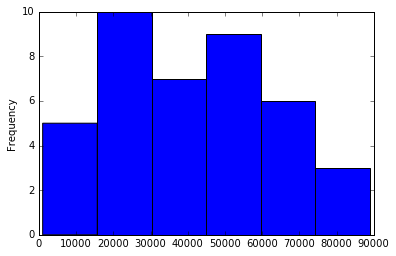

In [22]:
vstable["Income"].plot(kind="hist", bins=6)

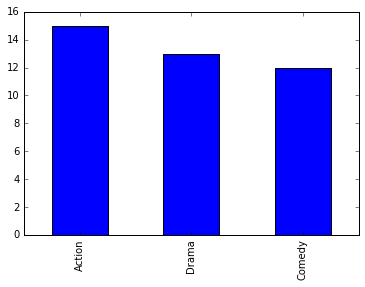

In [23]:
vstable["Genre"].value_counts().plot(kind='bar')

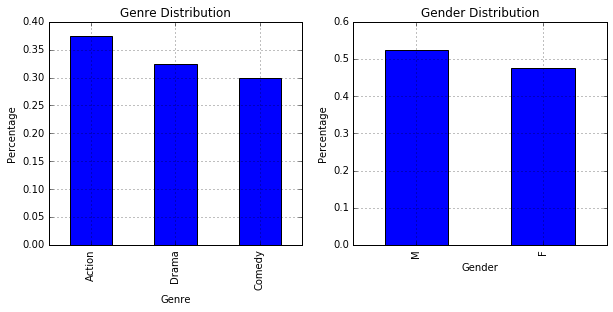

In [24]:
temp1 = vstable["Genre"].value_counts()/vstable["Genre"].count()
temp2 = vstable["Gender"].value_counts()/vstable["Gender"].count()
temp2

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Percentage')
ax1.set_title("Genre Distribution")
temp1.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Percentage')
ax1.set_title("Gender Distribution")
temp2.plot(kind='bar', grid = True)

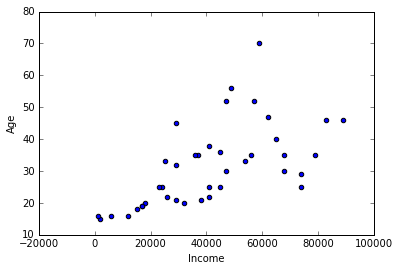

In [25]:
vstable.plot(x="Income", y="Age", kind="scatter")

In [26]:
vstable.groupby(["Genre","Gender"])["Gender"].count()

Genre   Gender
Action  F          5
        M         10
Comedy  F          6
        M          6
Drama   F          8
        M          5
Name: Gender, dtype: int64

In [27]:
gg = pd.crosstab(vstable["Genre"], vstable["Gender"])
gg

Gender,F,M
Genre,,
Action,5,10
Comedy,6,6
Drama,8,5


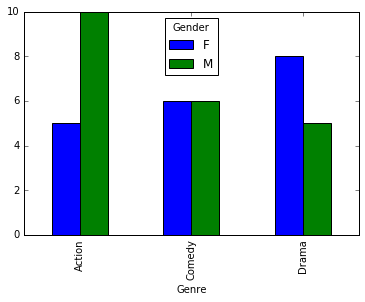

In [28]:
plt.show(gg.plot(kind="bar"))

In [29]:
gg["percent_female"] = gg["F"]/(gg["F"]+gg["M"])
gg

Gender,F,M,percent_female
Genre,,,
Action,5,10,0.333333
Comedy,6,6,0.500000
Drama,8,5,0.615385


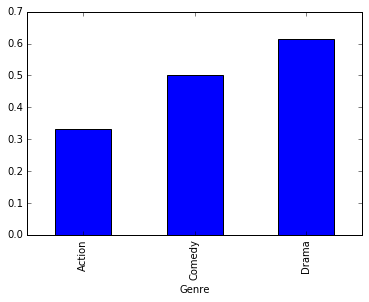

In [30]:
plt.show(gg["percent_female"].plot(kind="bar"))

In [31]:
good_cust = vstable[vstable.Rentals>=30]
good_cust

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
ID,,,,,,
3,F,32000,20,42,1.6,Comedy
6,M,18000,20,33,1.7,Action
8,M,74000,25,31,2.4,Action
11,F,41000,22,48,2.3,Drama
15,M,68000,30,36,2.7,Comedy
18,F,6000,16,39,1.8,Action
19,F,24000,25,41,3.1,Comedy
23,F,2000,15,30,2.5,Comedy
26,F,56000,35,40,2.6,Action


In [32]:
print "Good Customers:\n", good_cust.describe()
print "\n All Customers:\n", vstable.describe()

Good Customers:
             Income        Age    Rentals  AvgPerVisit
count     14.000000  14.000000  14.000000    14.000000
mean   37000.000000  24.428571  37.000000     2.507143
std    25404.421178   8.599770   5.349335     0.818502
min     2000.000000  15.000000  30.000000     1.600000
25%    17250.000000  19.250000  32.250000     1.875000
50%    30500.000000  21.500000  36.500000     2.350000
75%    60500.000000  28.000000  40.750000     2.675000
max    74000.000000  47.000000  48.000000     4.600000

 All Customers:
             Income        Age    Rentals  AvgPerVisit
count     40.000000  40.000000  40.000000    40.000000
mean   41500.000000  31.500000  26.175000     2.792500
std    22925.744123  12.752074   9.594035     0.833401
min     1000.000000  15.000000  11.000000     1.200000
25%    24750.000000  21.000000  19.000000     2.200000
50%    41000.000000  30.000000  25.000000     2.800000
75%    57500.000000  36.500000  32.250000     3.325000
max    89000.000000  70.000000  

In [33]:
gender_bin = pd.get_dummies(vstable["Gender"], prefix="Gender")
gender_bin.head()

,Gender_F,Gender_M
ID,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [34]:
vs_ssf = pd.get_dummies(vstable)
vs_ssf.head(10)

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
ID,,,,,,,,,
1,45000,25,27,2.5,0,1,1,0,0
2,54000,33,12,3.4,1,0,0,0,1
3,32000,20,42,1.6,1,0,0,1,0
4,59000,70,16,4.2,1,0,0,0,1
5,37000,35,25,3.2,0,1,1,0,0
6,18000,20,33,1.7,0,1,1,0,0
7,29000,45,19,3.8,1,0,0,0,1
8,74000,25,31,2.4,0,1,1,0,0
9,38000,21,18,2.1,0,1,0,1,0


In [35]:
vs_ssf.describe(include="all")

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000
mean,41500.000000,31.500000,26.175000,2.792500,0.475000,0.525000,0.37500,0.300000,0.325000
std,22925.744123,12.752074,9.594035,0.833401,0.505736,0.505736,0.49029,0.464095,0.474342
min,1000.000000,15.000000,11.000000,1.200000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,24750.000000,21.000000,19.000000,2.200000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,41000.000000,30.000000,25.000000,2.800000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,57500.000000,36.500000,32.250000,3.325000,1.000000,1.000000,1.00000,1.000000,1.000000
max,89000.000000,70.000000,48.000000,4.600000,1.000000,1.000000,1.00000,1.000000,1.000000


In [36]:
vs_norm = (vs_ssf - vs_ssf.min()) / (vs_ssf.max()-vs_ssf.min())
vs_norm.head(10)

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
ID,,,,,,,,,
1,0.500000,0.181818,0.432432,0.382353,0,1,1,0,0
2,0.602273,0.327273,0.027027,0.647059,1,0,0,0,1
3,0.352273,0.090909,0.837838,0.117647,1,0,0,1,0
4,0.659091,1.000000,0.135135,0.882353,1,0,0,0,1
5,0.409091,0.363636,0.378378,0.588235,0,1,1,0,0
6,0.193182,0.090909,0.594595,0.147059,0,1,1,0,0
7,0.318182,0.545455,0.216216,0.764706,1,0,0,0,1
8,0.829545,0.181818,0.540541,0.352941,0,1,1,0,0
9,0.420455,0.109091,0.189189,0.264706,0,1,0,1,0


In [37]:
vs_ssf.corr()

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Income,1.000000,0.613769,-0.262472,0.468565,-0.036490,0.036490,-0.302256,0.101217,0.213388
Age,0.613769,1.000000,-0.547113,0.629107,0.161022,-0.161022,-0.457274,0.021663,0.451453
Rentals,-0.262472,-0.547113,1.000000,-0.206353,0.151535,-0.151535,0.307303,-0.035128,-0.283266
AvgPerVisit,0.468565,0.629107,-0.206353,1.000000,0.203343,-0.203343,-0.306701,-0.119992,0.434413
Gender_F,-0.036490,0.161022,0.151535,0.203343,1.000000,-1.000000,-0.219744,0.032774,0.195067
Gender_M,0.036490,-0.161022,-0.151535,-0.203343,-1.000000,1.000000,0.219744,-0.032774,-0.195067
Genre_Action,-0.302256,-0.457274,0.307303,-0.306701,-0.219744,0.219744,1.000000,-0.507093,-0.537484
Genre_Comedy,0.101217,0.021663,-0.035128,-0.119992,0.032774,-0.032774,-0.507093,1.000000,-0.454257
Genre_Drama,0.213388,0.451453,-0.283266,0.434413,0.195067,-0.195067,-0.537484,-0.454257,1.000000


In [38]:
vs_norm.to_csv("Video_Store_Numeric.csv", float_format="%1.2f")